<a href="https://colab.research.google.com/github/suhani1209/Geeksman_AISquad_Project1_SUHANI-MITTAL-/blob/main/Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **In this notebook, I have trained the model how to distinguish the images in mobile phone's gallery into various albums such as whatsapp screenshots, memes,cars, trees, selfies and mountains.**

***Firstly, we will start by setting up kaggle***

***Step 1***

Upload kaggle.json file

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


***Step 2***

Setting up environment variables so that kaggle api can work properly.

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

***Step 3***

Downloading the dataset which I modified in the previous notebook and uploaded on my kaggle id.

In [ ]:
!kaggle datasets download -d suhanimittal12/mobile-gallery-image-classification

 97% 442M/456M [00:02<00:00, 137MB/s]
100% 456M/456M [00:02<00:00, 160MB/s]


***Step 4***

Unzip downloaded data

In [ ]:
!unzip "*.zip"

Archive:  mobile-gallery-image-classification.zip
  inflating: test/cars_008.jpg       
  inflating: test/cars_011.jpg       
  inflating: test/cars_024.jpg       
  inflating: test/cars_027.jpg       
  inflating: test/cars_035.jpg       
  inflating: test/cars_056.jpg       
  inflating: test/cars_076.jpg       
  inflating: test/cars_081.jpg       
  inflating: test/cars_082.jpg       
  inflating: test/cars_083.jpg       
  inflating: test/cars_086.jpg       
  inflating: test/cars_092.jpg       
  inflating: test/cars_099.jpg       
  inflating: test/cars_105.jpg       
  inflating: test/cars_119.jpg       
  inflating: test/cars_137.jpg       
  inflating: test/cars_139.jpg       
  inflating: test/cars_141.jpg       
  inflating: test/cars_149.jpg       
  inflating: test/cars_162.jpg       
  inflating: test/dwight.jpg         
  inflating: test/house.jpg          
  inflating: test/mahabodhi_tree.jpg  
  inflating: test/maruti800.jpg      
  inflating: test/memes_001.jpg      

***Exploring the data***

In [ ]:
os.listdir("train")

['Trees', 'Whatsapp_Screenshots', 'Memes', 'Mountains', 'Selfies', 'Cars']

***Training Model***

Just importing required libraries

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

***Defining the batch size***

In [ ]:
bs=64

***Creating data bunch object and here I have used the directory format for  getting data from folders so that it can be analyzed easily..***

***I have setted up do_flip=true just to include a little of data augmentation, for better training of the model.***

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("train"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

***Looking at some examples in data***

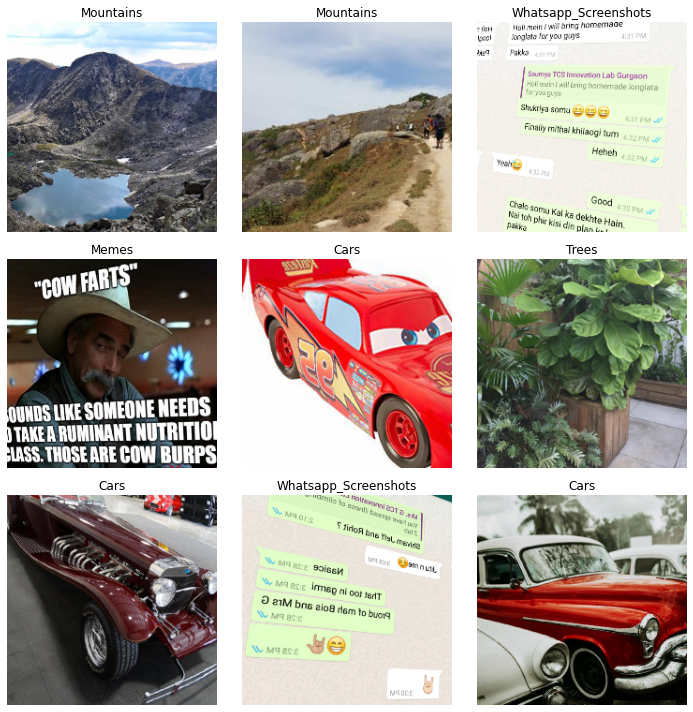

In [ ]:
data.show_batch(rows=3, figsize=(10,10))

***Exploring different classes present in data***

In [ ]:
print(data.classes)
len(data.classes)

['Cars', 'Memes', 'Mountains', 'Selfies', 'Trees', 'Whatsapp_Screenshots']


6

***Creating a model to get trained...***

And here about the paramters like 

***data ***--> databunch I created(converting data in a format so that it can be trained)

***models.resnet50*** -->resnet50 model will be used.

***metrices*** -->It just shows accuracy after each epoch so that we can see how well our model is doing.

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


***Training the model***

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.762888,0.128862,0.972332,09:41
1,0.399677,0.070941,0.964427,09:43
2,0.247313,0.083182,0.972332,09:48
3,0.170772,0.071374,0.976285,09:47


***Mounting Google Drive***

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


***I have used Google drive to save results ***

***So I have created a folder named dl_projects for all projects and in this a subdirectory for each project like in this directory name is mobile_gallery_img_classification so that data related to this project can be found there***

***os.makedirs()*** -->This method will create all unavailable/missing directory in the specified path.

***exist_ok*** -->A default value False is used for this parameter. If the target directory already exists an OSError is raised if its value is False otherwise not.

In [ ]:
os.makedirs("/content/drive/My Drive/dl_projects/mobile_gallery_img_classification",exist_ok=True)

***Saving our directory path to a variable so that we don"t have to write so long everytime to refer to the directory***

In [ ]:
my_dir="/content/drive/My Drive/dl_projects/mobile_gallery_img_classification"

***Saving the state with name as stage-1 in Google drive directory..***


In [ ]:
learn.save(my_dir+"/Stage-1")

***And here is exactly what a thing called model is generated and saved and notice one thing that this model is generated from learn variable itself.***

In [ ]:
learn.export(my_dir+"/export.pkl")

**Let's see the results** . 

 The thing I have focussed on is which were the categories that the model most confused with one another. I have tried to see if what the model predicted was reasonable or not.

Furthermore, I have plotted the confusion matrix and I have observed that the model is quite accurate.Also, this suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

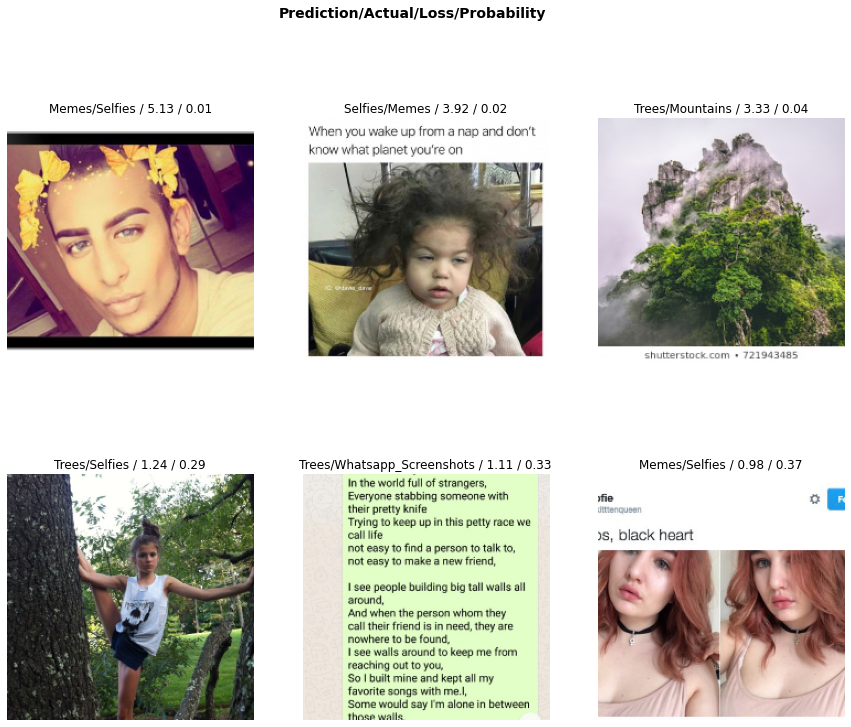

In [ ]:
interp.plot_top_losses(6, figsize=(15,12))

**Plotting confusion matrix**


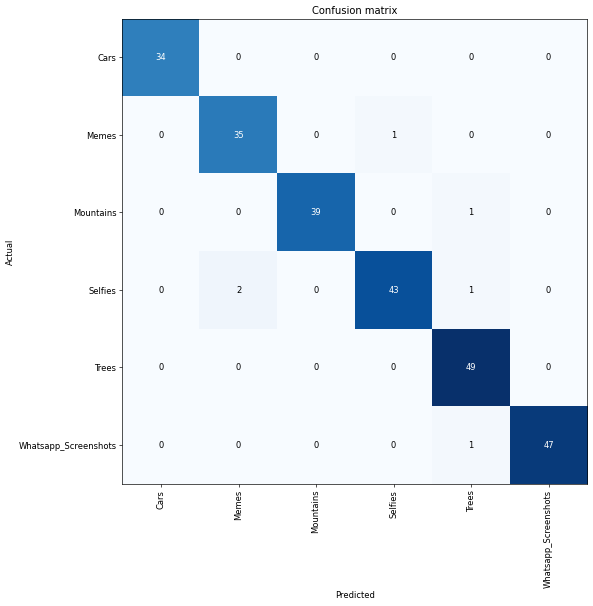

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [ ]:
interp.most_confused(min_val=1)

[('Selfies', 'Memes', 2),
 ('Memes', 'Selfies', 1),
 ('Mountains', 'Trees', 1),
 ('Selfies', 'Trees', 1),
 ('Whatsapp_Screenshots', 'Trees', 1)]